In [12]:
import numpy as np
import matplotlib.pyplot as pl
from astropy.io import fits
%matplotlib inline

## What n(z) to use:

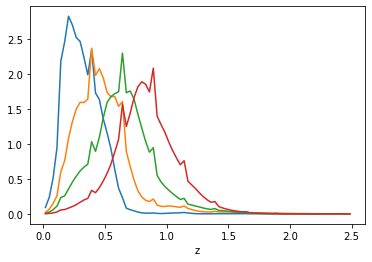

In [13]:
nzfile = '/Users/secco/Documents/Cosmology/DELVE/CosmicShearCosmosis/covariance/Sep18th/delve_nzs_0613.nz'
z = np.loadtxt(nzfile)
pl.figure()
for i in range(1,5):
    pl.plot(z[:,0],z[:,i])
pl.xlabel('z')
pl.show()

## What covariance to use
(assumes the covariance was generated with the nz above)

In [3]:
c = np.loadtxt('/Users/secco/Documents/Cosmology/DELVE/CosmicShearCosmosis/covariance/Sep18th/Sep18th_cov.txt')

In [4]:
!head  /Users/secco/Documents/Cosmology/DELVE/CosmicShearCosmosis/covariance/Sep18th/Sep18th_cov.txt

# Please cite the following papers in research using this covariance:
# arXiv: 1601.05779, https://arxiv.org/abs/1601.05779
# arXiv: 1911.11947, https://arxiv.org/abs/1911.11947
# arXiv: 2004.04833, https://arxiv.org/abs/2004.04833
########################################################
0 0 8.249656e-04 8.249656e-04 0 0 0 0 1.252334e-10 0.000000e+00
0 1 8.249656e-04 1.038570e-03 0 0 0 0 1.451726e-13 0.000000e+00
0 2 8.249656e-04 1.307482e-03 0 0 0 0 1.215088e-13 0.000000e+00
0 3 8.249656e-04 1.646023e-03 0 0 0 0 1.000771e-13 0.000000e+00
0 4 8.249656e-04 2.072220e-03 0 0 0 0 8.159814e-14 0.000000e+00


In [5]:
covmat_NEW = np.ones((400,400))
for i in range(len(c[:,0])):
    covmat_NEW[int(c[i,0]), int(c[i,1])] = c[i,-2]
    covmat_NEW[int(c[i,1]), int(c[i,0])] = c[i,-2]
assert len(np.where(covmat_NEW==1.)[0])==0

<ipython-input-14-e7b6cf262f63>:1: RuntimeWarning: invalid value encountered in log10
  pl.imshow(np.log10(covmat_NEW))


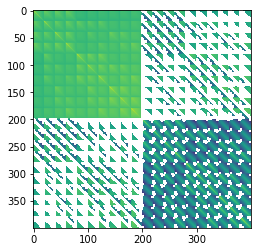

In [14]:
pl.imshow(np.log10(covmat_NEW))

## Put everything into a cosmosis-ready fits file
Then, we need to generate the actual cosmology save a new data vector

In [8]:
f=fits.open('placeholder.fits')
f.info()

Filename: placeholder.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        13   (400, 400)   float64   
  2  xip           1 BinTableHDU     35   200R x 7C   [K, K, K, D, D, D, D]   
  3  xim           1 BinTableHDU     35   200R x 7C   [K, K, K, D, D, D, D]   
  4  nz_source     1 BinTableHDU     24   301R x 7C   [D, D, D, D, D, D, D]   


In [9]:
baseline_fits = 'placeholder.fits'
output_fits = 'needs_cosmology.fits'

covmat,header_covmat = fits.getdata(baseline_fits,'COVMAT',header=True)
source,header_source = fits.getdata(baseline_fits,'nz_source',header=True)
xip,header_xip = fits.getdata(baseline_fits,'xip',header=True)
xim,header_xim = fits.getdata(baseline_fits,'xim',header=True)

z,nz1,nz2,nz3,nz4 = np.loadtxt(nzfile,unpack=True)
deltaz = (z[1]-z[0])/2 #to get the edge values

source = source[0:len(z)]
header_source['NAXIS2'] = len(z)

source['z_low'] = z-deltaz
source['z_mid'] = z
source['z_high'] = z+deltaz
source['bin1'] = nz1
source['bin2'] = nz2
source['bin3'] = nz3
source['bin4'] = nz4

base_header = fits.open(baseline_fits)
fits.append(output_fits,base_header[0].data,base_header[0].header)
fits.append(output_fits,covmat_NEW,header_covmat)
fits.append(output_fits,xip,header_xip)
fits.append(output_fits,xim,header_xim)
fits.append(output_fits,source,header_source)
base_header.close()

In [11]:
g=fits.open('needs_cosmology.fits')
g.info()

Filename: needs_cosmology.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        13   (400, 400)   float64   
  2  xip           1 BinTableHDU     35   200R x 7C   [K, K, K, D, D, D, D]   
  3  xim           1 BinTableHDU     35   200R x 7C   [K, K, K, D, D, D, D]   
  4  nz_source     1 BinTableHDU     24   80R x 7C   [D, D, D, D, D, D, D]   
